# FreeCodeCamp

1.Add an overweight column to the data. To determine if a person is overweight, first calculate their   BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

2.Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is   1, make the value 0. If the value is more than 1, make the value 1.

3.Convert the data into long format and create a chart that shows the value counts of the categorical   features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for   each cardio value. The chart should look like examples/Figure_1.png.

4.Clean the data. Filter out the following patient segments that represent incorrect data:
  diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
  height is less than the 2.5th percentile (Keep the correct data with (df['height'] >=        df['height'].quantile(0.025)))
  height is more than the 97.5th percentile
  weight is less than the 2.5th percentile
  weight is more than the 97.5th percentile

5.Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's  heatmap().

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = {
    'age': [18393, 20228, 18857, 17623, 17474],
    'height': [168, 156, 165, 169, 156],
    'weight': [62.0, 85.0, 64.0, 82.0, 56.0],
    'gender': [1, 1, 0, 1, 0],
    'ap_hi': [110, 140, 130, 150, 100],
    'ap_lo': [80, 90, 70, 100, 60],
    'cholesterol': [1, 3, 3, 1, 1],
    'gluc': [1, 1, 1, 1, 1],
    'smoke': [0, 0, 0, 0, 0],
    'alco': [0, 0, 0, 0, 0],
    'active': [1, 1, 0, 1, 0],
    'cardio': [0, 1, 1, 1, 0]
}

In [3]:
# 3. Add an "overweight" column
df = pd.DataFrame(data)
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)
print("ADDING OVERWEIGHT COLUMN",df)


ADDING OVERWEIGHT COLUMN      age  height  weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393     168    62.0       1    110     80            1     1      0   
1  20228     156    85.0       1    140     90            3     1      0   
2  18857     165    64.0       0    130     70            3     1      0   
3  17623     169    82.0       1    150    100            1     1      0   
4  17474     156    56.0       0    100     60            1     1      0   

   alco  active  cardio        BMI  overweight  
0     0       1       0  21.967120           0  
1     0       1       1  34.927679           1  
2     0       0       1  23.507805           0  
3     0       1       1  28.710479           1  
4     0       0       0  23.011177           0  


In [4]:
# 4. Normalize the data
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
print("NORMALISING THE DATA",df)


NORMALISING THE DATA      age  height  weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393     168    62.0       1    110     80            0     0      0   
1  20228     156    85.0       1    140     90            1     0      0   
2  18857     165    64.0       0    130     70            1     0      0   
3  17623     169    82.0       1    150    100            0     0      0   
4  17474     156    56.0       0    100     60            0     0      0   

   alco  active  cardio        BMI  overweight  
0     0       1       0  21.967120           0  
1     0       1       1  34.927679           1  
2     0       0       1  23.507805           0  
3     0       1       1  28.710479           1  
4     0       0       0  23.011177           0  


In [5]:
# 5. Clean the data
df = df[(df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]
print("CLEANING THE DATA",df)

CLEANING THE DATA      age  height  weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393     168    62.0       1    110     80            0     0      0   
2  18857     165    64.0       0    130     70            1     0      0   

   alco  active  cardio        BMI  overweight  
0     0       1       0  21.967120           0  
2     0       0       1  23.507805           0  


In [6]:
# 6. Convert the data into long format
df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
print("CONVERTING THE DATA INTO LONG FORMAT",df)

CONVERTING THE DATA INTO LONG FORMAT      age  height  weight  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393     168    62.0       1    110     80            0     0      0   
2  18857     165    64.0       0    130     70            1     0      0   

   alco  active  cardio        BMI  overweight  
0     0       1       0  21.967120           0  
2     0       0       1  23.507805           0  


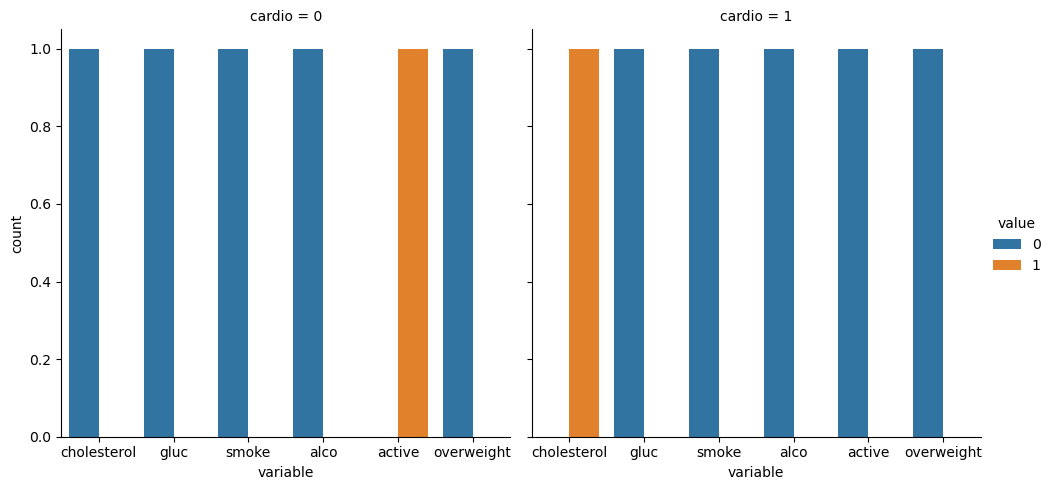

In [7]:
# 7. Create a chart using seaborn's catplot()
sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count')

In [8]:
# 8. Create a correlation matrix and plot heatmap
corr_matrix = df.corr()
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

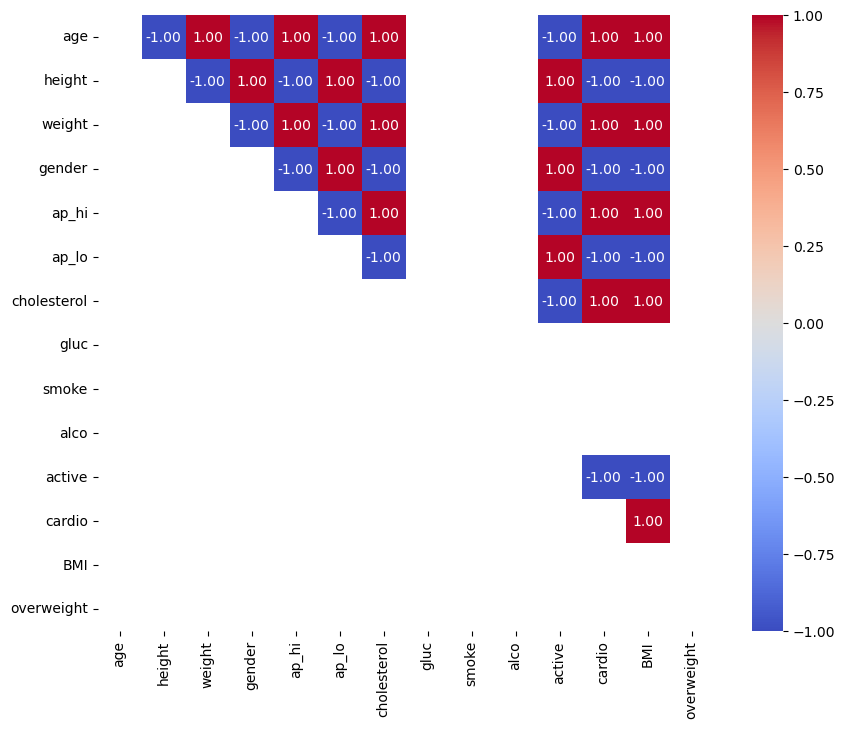

In [9]:

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, square=True, ax=ax)
plt.show()

